In [111]:
# importing libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt



In [112]:
# _URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
# path_to_zip = tf.keras.utils.get_file('/content/drive/MyDrive/Luminar_Technolab/Deep_learning/CNN/cats_and_dogs.zip', origin=_URL, extract=True)


In [113]:
# PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs.zip')
# New_PATH="/content/drive/MyDrive/Luminar_Technolab/Deep_learning/CNN/cats_and_dogs"
# !unzip $PATH -d $New_PATH

In [114]:
dataPath = "/content/drive/MyDrive/Luminar_Technolab/Deep_learning/CNN/cats_and_dogs/cats_and_dogs_filtered"
! ls $dataPath

train  validation  vectorize.py


In [115]:
train_dir = os.path.join(dataPath,'train')
validation_dir = os.path.join(dataPath,'validation')

train_dir


'/content/drive/MyDrive/Luminar_Technolab/Deep_learning/CNN/cats_and_dogs/cats_and_dogs_filtered/train'

In [116]:
train_cats_dir = os.path.join(train_dir,'cats') # Directory with our training cat pics
train_dogs_dir = os.path.join(train_dir,'dogs') # Directory with our training dogs pics
validation_cats_dir = os.path.join(validation_dir,'cats') # Directory with our validation cats pics
validation_dogs_dir = os.path.join(validation_dir,'dogs') # Directory with our validation dogs pics

In [117]:
num_cat_tr =  len(os.listdir(train_cats_dir))
num_dog_tr =  len(os.listdir(train_dogs_dir))
num_cat_val =  len(os.listdir(validation_cats_dir))
num_dog_val =  len(os.listdir(validation_dogs_dir))

total_train = num_cat_tr + num_dog_tr
total_val = num_cat_val + num_dog_val

In [118]:
print('total training cat images :',num_cat_tr)
print('total training dog images :',num_dog_tr)
print("=======================================")
print('total validation cat images :',num_cat_val)
print('total validation dog images :',num_dog_val)
print("=======================================")
print(f"total training images : {total_train}")
print(f"total validation images : {total_val}")

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500
total training images : 2000
total validation images : 1000


In [119]:
batch_size= 128 # power of 2 --> 64, 128, 256, 512
epochs=30
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [120]:
train_image_generator = ImageDataGenerator(rescale=1./255) #generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # generator for our validation data

In [121]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                          directory = train_dir,
                                          shuffle = True,
                                          target_size = (IMG_HEIGHT,IMG_WIDTH),
                                          class_mode = 'binary')   # Multiclass = > classmode = 'categorical'

Found 2000 images belonging to 2 classes.


In [122]:
validation_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                          directory = validation_dir,
                                          # shuffle = True,
                                          target_size = (IMG_HEIGHT,IMG_WIDTH),
                                          class_mode = 'binary')   # Multiclass = > classmode = 'categorical'

Found 1000 images belonging to 2 classes.


In [123]:
sample_tr, check = next(train_data_gen)

In [124]:
len(sample_tr)

128

In [125]:
check

array([0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 1.], dtype=float32)

In [126]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

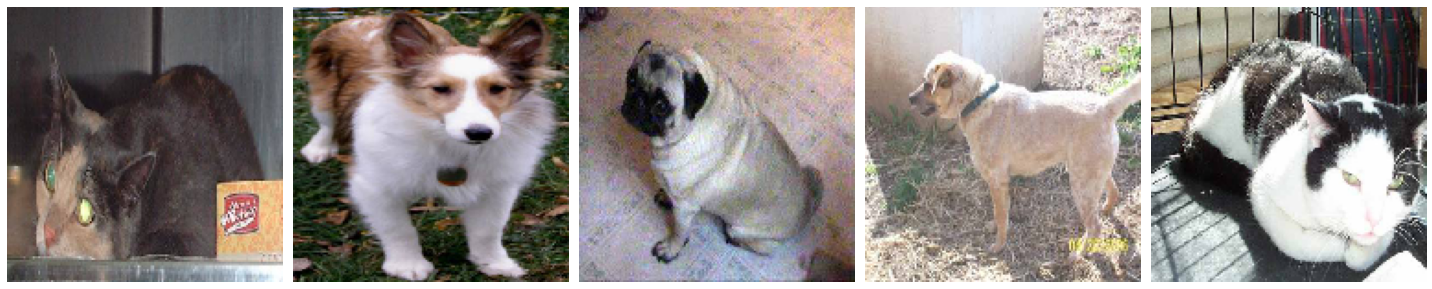

In [127]:
#sample training images first 5

plotImages(sample_tr[0:])

In [128]:
#let trains

model = Sequential([
        Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
        MaxPooling2D(),
        Conv2D(32,3,padding='same',activation='relu'),
        MaxPooling2D(),
        Conv2D(64,3,padding='same',activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512,activation='relu'),
        Dense(1,activation='sigmoid')
        ])

                  

In [129]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

In [130]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 18, 18, 64)      

In [131]:
# Model fit

history = model.fit(train_data_gen,
                    steps_per_epoch = total_train//batch_size,
                    epochs = 30,
                    validation_data = validation_data_gen,
                    validation_steps = total_val//batch_size
                    )

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


15/15 [==============================] - 13s 824ms/step - loss: 1.0766 - accuracy: 0.4936 - val_loss: 0.6898 - val_accuracy: 0.5536
Epoch 2/30
15/15 [==============================] - 12s 789ms/step - loss: 0.6864 - accuracy: 0.5796 - val_loss: 0.6630 - val_accuracy: 0.5971
Epoch 3/30
15/15 [==============================] - 12s 844ms/step - loss: 0.6413 - accuracy: 0.6464 - val_loss: 0.6187 - val_accuracy: 0.6696
Epoch 4/30
15/15 [==============================] - 12s 794ms/step - loss: 0.5917 - accuracy: 0.6886 - val_loss: 0.5835 - val_accuracy: 0.6987
Epoch 5/30
15/15 [==============================] - 12s 807ms/step - loss: 0.5256 - accuracy: 0.7468 - val_loss: 0.5715 - val_accuracy: 0.7076
Epoch 6/30
15/15 [==============================] - 11s 781ms/step - loss: 0.5213 - accuracy: 0.7350 - val_loss: 0.5801 - val_accuracy: 0.7121
Epoch 7/30
15/15 [==============================] - 11s 778ms/step - loss: 0.4626 - accuracy: 0.7879 - val_loss: 0.5927 - val_accuracy: 0.6942
Epoch 8/30

In [132]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

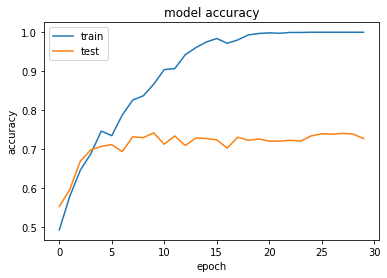

In [133]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

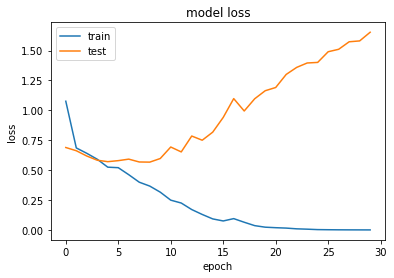

In [134]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Data augmentation

Found 2000 images belonging to 2 classes.


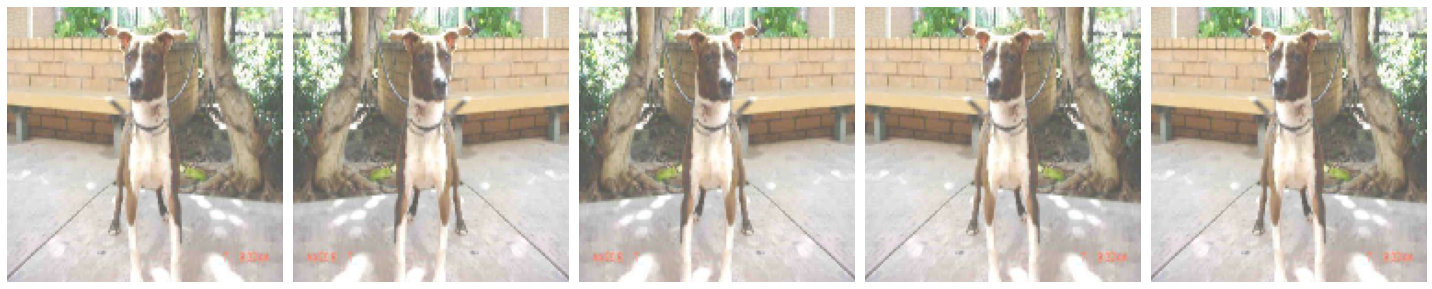

In [135]:
# 1.Horizontal flip

train_images_horizontal = ImageDataGenerator(rescale = 1./255,horizontal_flip=True)
train_images_horizontal_gen = train_images_horizontal.flow_from_directory(batch_size=batch_size,
                                          directory = train_dir,
                                          shuffle = True,
                                          target_size = (IMG_HEIGHT,IMG_WIDTH),
                                          class_mode = 'binary')   # Multiclass = > classmode = 'categorical')



augmented_images = [train_images_horizontal_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


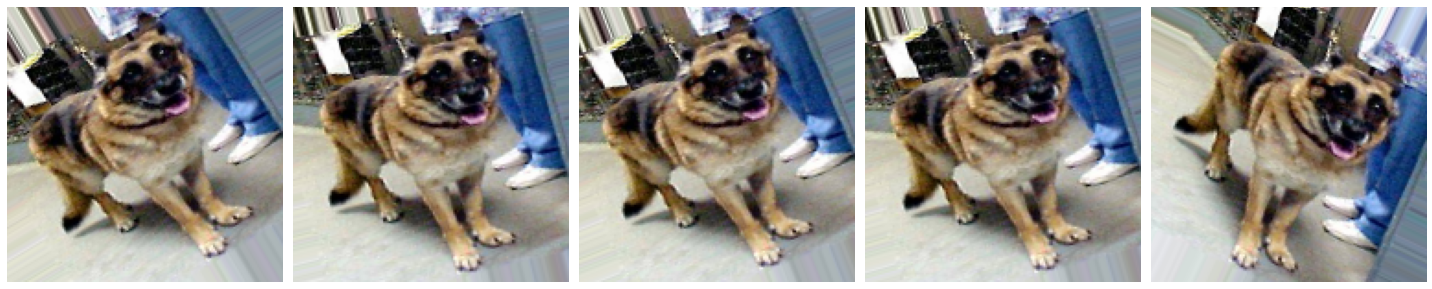

In [136]:
# 2.Rotation

train_images_rotation = ImageDataGenerator(rescale = 1./255,rotation_range=45)
train_images_rotation_gen = train_images_rotation.flow_from_directory(batch_size=batch_size,
                                          directory = train_dir,
                                          shuffle = True,
                                          target_size = (IMG_HEIGHT,IMG_WIDTH),
                                          class_mode = 'binary')   # Multiclass = > classmode = 'categorical')



augmented_images = [train_images_rotation_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


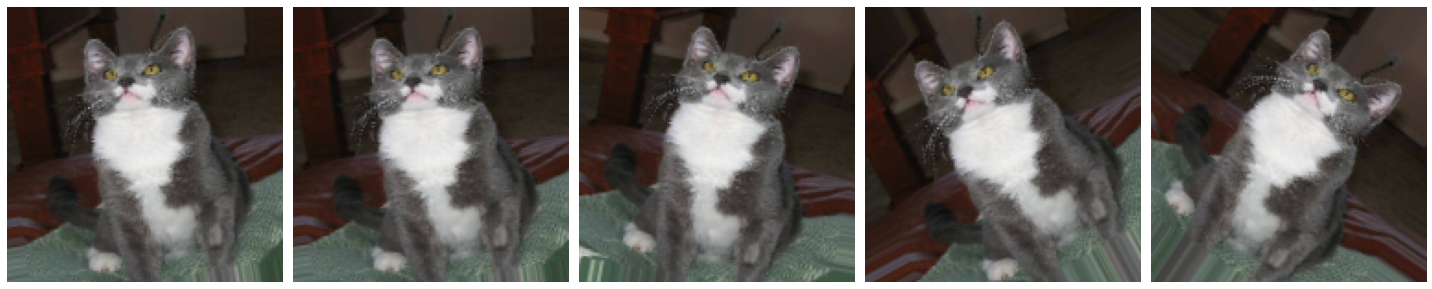

In [137]:
# 3.Zoom

train_images_zoom = ImageDataGenerator(rescale = 1./255,zoom_range=0.5)
train_images_zoom_gen = train_images_rotation.flow_from_directory(batch_size=batch_size,
                                          directory = train_dir,
                                          shuffle = True,
                                          target_size = (IMG_HEIGHT,IMG_WIDTH),
                                          class_mode = 'binary')   # Multiclass = > classmode = 'categorical')




augmented_images = [train_images_zoom_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)   

#### Retraining


In [138]:

train_images_generator = ImageDataGenerator(rescale = 1./255,
                                           rotation_range=45,
                                           horizontal_flip=True,
                                           zoom_range=0.5,
                                           width_shift_range=.15,
                                           height_shift_range=0.15 # generator for our training data
                                          )
train_data_gen = train_images_generator.flow_from_directory(batch_size=batch_size,
                                          directory = train_dir,
                                          shuffle = True,
                                          target_size = (IMG_HEIGHT,IMG_WIDTH),
                                          class_mode = 'binary')   # Multiclass = > classmode = 'categorical')



Found 2000 images belonging to 2 classes.


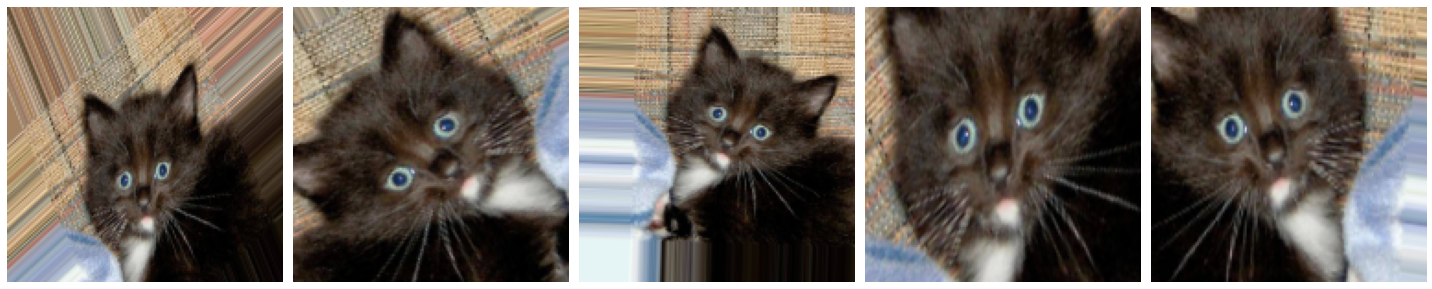

In [139]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images) 

In [140]:
#Let trains
# Dropout

model_new = Sequential([
        Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
        MaxPooling2D(),
        Dropout(0.2),
        Conv2D(32,3,padding='same',activation='relu'),
        MaxPooling2D(),
        Conv2D(64,3,padding='same',activation='relu'),
        MaxPooling2D(),
        Dropout(0.2),
        Flatten(),
        Dense(512,activation='relu'),
        Dense(1,activation='sigmoid')
])

In [141]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])


In [142]:
model_new.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 75, 75, 16)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 37, 37, 64)       

In [143]:
history = model_new.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=100,
    validation_data=validation_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


15/15 [==============================] - 22s 1s/step - loss: 1.1598 - accuracy: 0.5085 - val_loss: 0.6925 - val_accuracy: 0.5201
Epoch 2/100
15/15 [==============================] - 21s 1s/step - loss: 0.6935 - accuracy: 0.4995 - val_loss: 0.6920 - val_accuracy: 0.5257
Epoch 3/100
15/15 [==============================] - 22s 1s/step - loss: 0.6917 - accuracy: 0.5374 - val_loss: 0.6888 - val_accuracy: 0.5045
Epoch 4/100
15/15 [==============================] - 20s 1s/step - loss: 0.6880 - accuracy: 0.5529 - val_loss: 0.6772 - val_accuracy: 0.5692
Epoch 5/100
15/15 [==============================] - 20s 1s/step - loss: 0.6909 - accuracy: 0.5454 - val_loss: 0.6856 - val_accuracy: 0.6016
Epoch 6/100
15/15 [==============================] - 20s 1s/step - loss: 0.6900 - accuracy: 0.5438 - val_loss: 0.6755 - val_accuracy: 0.5815
Epoch 7/100
15/15 [==============================] - 20s 1s/step - loss: 0.6883 - accuracy: 0.5337 - val_loss: 0.6801 - val_accuracy: 0.5893
Epoch 8/100
15/15 [======

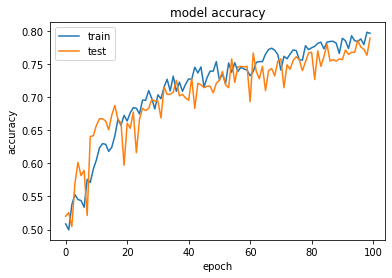

In [144]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

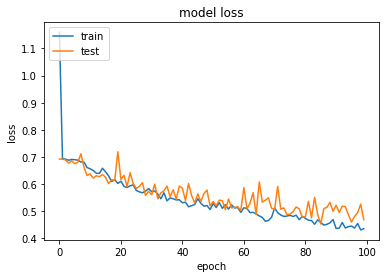

In [145]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [156]:
# Predicting with new data

img_size = (150,150)

from PIL import Image
import numpy as np

im = Image.open("/content/drive/MyDrive/Luminar_Technolab/Deep_learning/CNN/cat4.jpg")
im = im.resize(img_size)
im = np.expand_dims(im,axis=0)
im = np.array(im)
im=im/255

pred = model_new.predict([im])
pred = pred[0][0]

if pred >=0.5:
  prediction='dog'
  print("Dog")
else:
  prediction='cat'
  print("Cat")

Cat


In [148]:
# Saving model

model_new.save("/content/drive/MyDrive/Luminar_Technolab/Deep_learning/CNN/CatsVsDogs_clf.h5")